# Suivi spectrophotométrique d'une cinétique (de pseudo-ordre 1)

## Réaction du peroxyde d'hydrogène avec les ions iodure en milieu acide 

(Les ions iodure et oxonium doivent être en large excès afin que leurs concentrations soient considérées comme constantes le temps du suivi cinétique)

On suivera l'évolution de la concentration du peroxyde d'hydrogène dans le temps.

Equation de la réaction : $H_2O_{2(aq)}+2I^{-}_{(aq)}+2H^+_{(aq)}\rightarrow I_{2_(aq)} + 2 H_2O_{(l)}$

In [1]:
# Import des bibliothèques 

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

In [2]:
t = np.array([0,60,120,180,240,300,360,420,480,540,600,660,720,780,840,900])
# Valeurs de l'absorbance
A = np.array([0,0.6531,1.145,1.540,1.831,2.040,2.175,2.267,2.318,2.368,
              2.398,2.428,2.439,2.439,2.439,2.439])

In [3]:
Af = A[-1]   # dernière valeur de la liste
C0 = 2.9e-3  # C0 conc init en H2O2 en mol/L

In [4]:
 C = C0*(1-A/Af)   # C concentration en H2O2 en mol/L
 a=-1              # nombre stoechiométrique algébrique du peroxyde d'hydrogène (négatif pour les réactifs, positif pour les produits)
    

In [5]:
# fonction permettant de calculer la vitesse de disparition d'un réactif ou la vitesse d'apparition d'un produit
def vitesse(t,C):
    v=[]
    for i in range (len(t)-1):
        vi=1/a*(C[i+1]-C[i])/(t[i+1]-t[i])
        v.append(vi)
    return v

In [6]:
v=vitesse (t,C)
print (v)

[1.2942394423944239e-05, 9.747915812491457e-06, 7.827661609949433e-06, 5.7667076670766685e-06, 4.141724750580841e-06, 2.6752767527675236e-06, 1.8231515648489837e-06, 1.0106601066010686e-06, 9.908432417657482e-07, 5.945059450594533e-07, 5.945059450594479e-07, 2.1798551318846762e-07, -0.0, -0.0, -0.0]


In [7]:
t=np.delete(t,-1)
C=np.delete(C,-1)

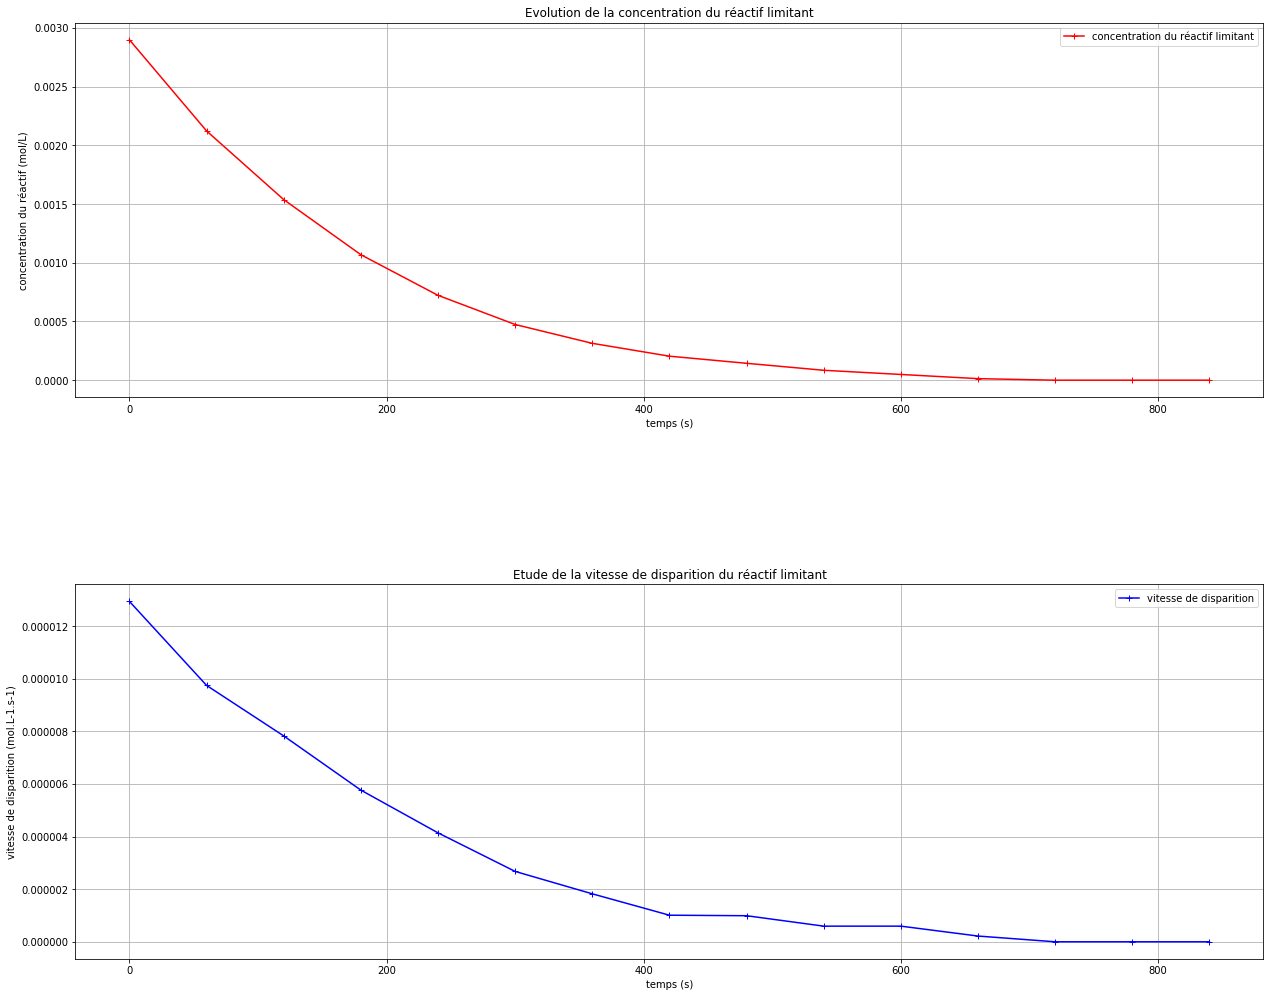

In [8]:
plt.figure(figsize=(12,10))
plt.gcf().subplots_adjust(left =0.125, bottom = 0.2, right = 1.5, top = 1.5, wspace = 0.5, hspace = 0.5)
plt.subplot(2,1,1)
plt.plot(t,C,"r+-", label="concentration du réactif limitant")
plt.xlabel("temps (s)")
plt.ylabel("concentration du réactif (mol/L)")
plt.title("Evolution de la concentration du réactif limitant")
plt.grid()
plt.legend()
plt.subplot(2,1,2)
plt.plot(t,v,"b+-",label="vitesse de disparition")
plt.xlabel("temps (s)")
plt.ylabel("vitesse de disparition (mol.L-1.s-1)")
plt.grid()
plt.title("Etude de la vitesse de disparition du réactif limitant")
plt.legend()
plt.show()




la constante de vitesse k vaut: 0.004540551159138042 s-1
l'ordonnée à l'origine vaut: 3.0512319365521515e-07 mol.L-1.s-1
[1.34727216e-05 9.94678531e-06 7.29113069e-06 5.15861681e-06
 3.58757494e-06 2.45923215e-06 1.73039829e-06 1.23371152e-06
 9.58374281e-07 6.88435815e-07 5.26472736e-07 3.64509656e-07
 3.05123194e-07 3.05123194e-07 3.05123194e-07]
vmodel= 0.004540551159138042 *C
Le coefficient de corrélation vaut 0.9963121971052862


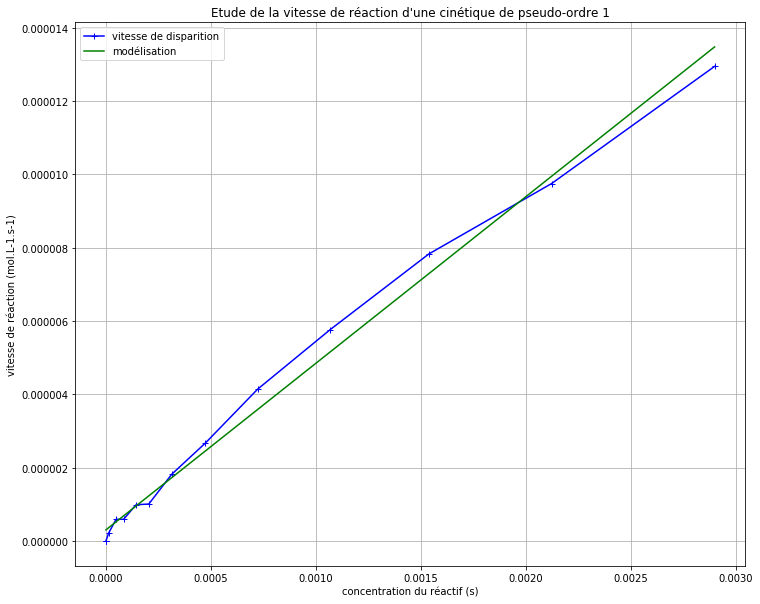

In [9]:
# Modélisation de la droite v=f(C) afin de déterminer la constante de vitesse k (coefficient directeur)

slope, intercept, r_value, p_value, std_error = stats.linregress(C, v)
print ("la constante de vitesse k vaut:",slope,"s-1")
print("l'ordonnée à l'origine vaut:",intercept,"mol.L-1.s-1")
vmodel = slope*C+intercept
print(vmodel)
print ("vmodel=",slope,"*C")
print ("Le coefficient de corrélation vaut",r_value)
plt.figure(figsize=(12,10))
plt.plot(C,v,"b+-",label="vitesse de disparition")
plt.plot(C,vmodel,"g-",label="modélisation")
plt.xlabel("concentration du réactif (s)")
plt.ylabel("vitesse de réaction (mol.L-1.s-1)")
plt.title("Etude de la vitesse de réaction d'une cinétique de pseudo-ordre 1")
plt.grid()
plt.legend()
plt.show()
